<a href="https://colab.research.google.com/github/JairusTheAnalyst/JairusTheAnalyst/blob/main/The_DBSCAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage
import warnings
warnings.filterwarnings('ignore')

# Load the dataset
df = pd.read_csv('BankChurners.csv')

print("Dataset Overview:")
print(f"Shape: {df.shape}")
print("\nFirst 5 rows:")
print(df.head())
print("\nDataset Info:")
print(df.info())
print("\nColumn names:")
print(df.columns.tolist())

Dataset Overview:
Shape: (10127, 23)

First 5 rows:
   CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0  768805383  Existing Customer            45      M                3   
1  818770008  Existing Customer            49      F                5   
2  713982108  Existing Customer            51      M                3   
3  769911858  Existing Customer            40      F                4   
4  709106358  Existing Customer            40      M                3   

  Education_Level Marital_Status Income_Category Card_Category  \
0     High School        Married     $60K - $80K          Blue   
1        Graduate         Single  Less than $40K          Blue   
2        Graduate        Married    $80K - $120K          Blue   
3     High School        Unknown  Less than $40K          Blue   
4      Uneducated        Married     $60K - $80K          Blue   

   Months_on_book  ...  Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
0              39  ...       12691

In [11]:
df=pd.read_csv("/content/BankChurners.csv")


In [12]:
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [13]:
print("Dataset Overview:")
print(f"Shape: {df.shape}")
print("\nFirst 5 rows:")
print(df.head())
print("\nDataset Info:")
print(df.info())
print("\nColumn names:")
print(df.columns.tolist())

Dataset Overview:
Shape: (10127, 23)

First 5 rows:
   CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0  768805383  Existing Customer            45      M                3   
1  818770008  Existing Customer            49      F                5   
2  713982108  Existing Customer            51      M                3   
3  769911858  Existing Customer            40      F                4   
4  709106358  Existing Customer            40      M                3   

  Education_Level Marital_Status Income_Category Card_Category  \
0     High School        Married     $60K - $80K          Blue   
1        Graduate         Single  Less than $40K          Blue   
2        Graduate        Married    $80K - $120K          Blue   
3     High School        Unknown  Less than $40K          Blue   
4      Uneducated        Married     $60K - $80K          Blue   

   Months_on_book  ...  Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
0              39  ...       12691

Initial data cleaning...

Missing values:
CLIENTNUM                                                                                                                             0
Attrition_Flag                                                                                                                        0
Customer_Age                                                                                                                          0
Gender                                                                                                                                0
Dependent_count                                                                                                                       0
Education_Level                                                                                                                       0
Marital_Status                                                                                                                        0
Income

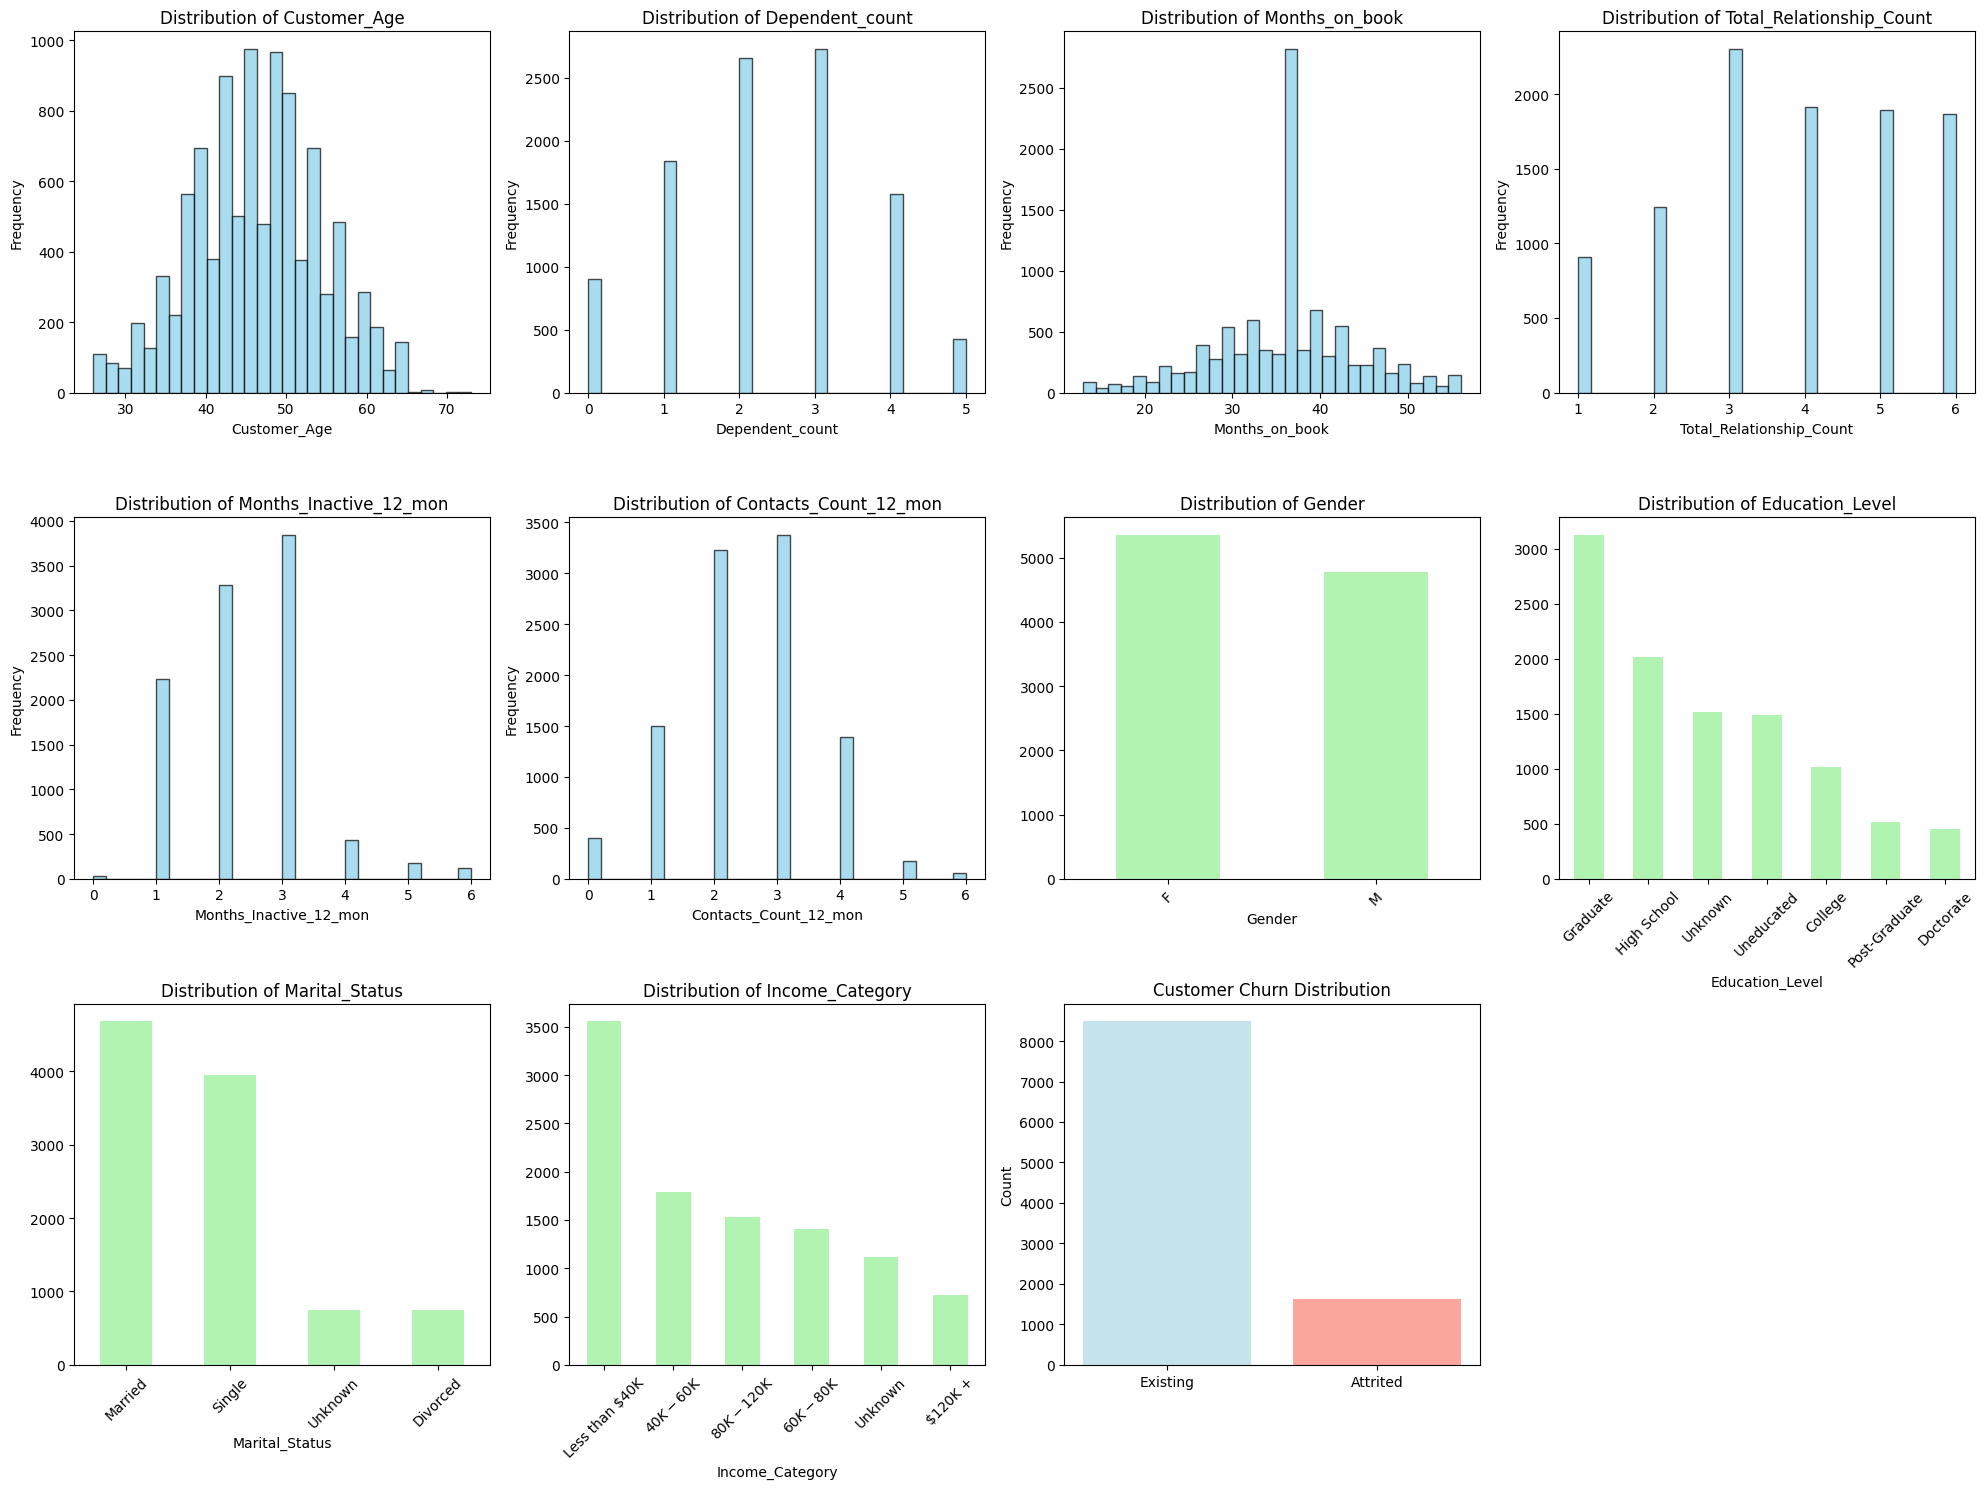

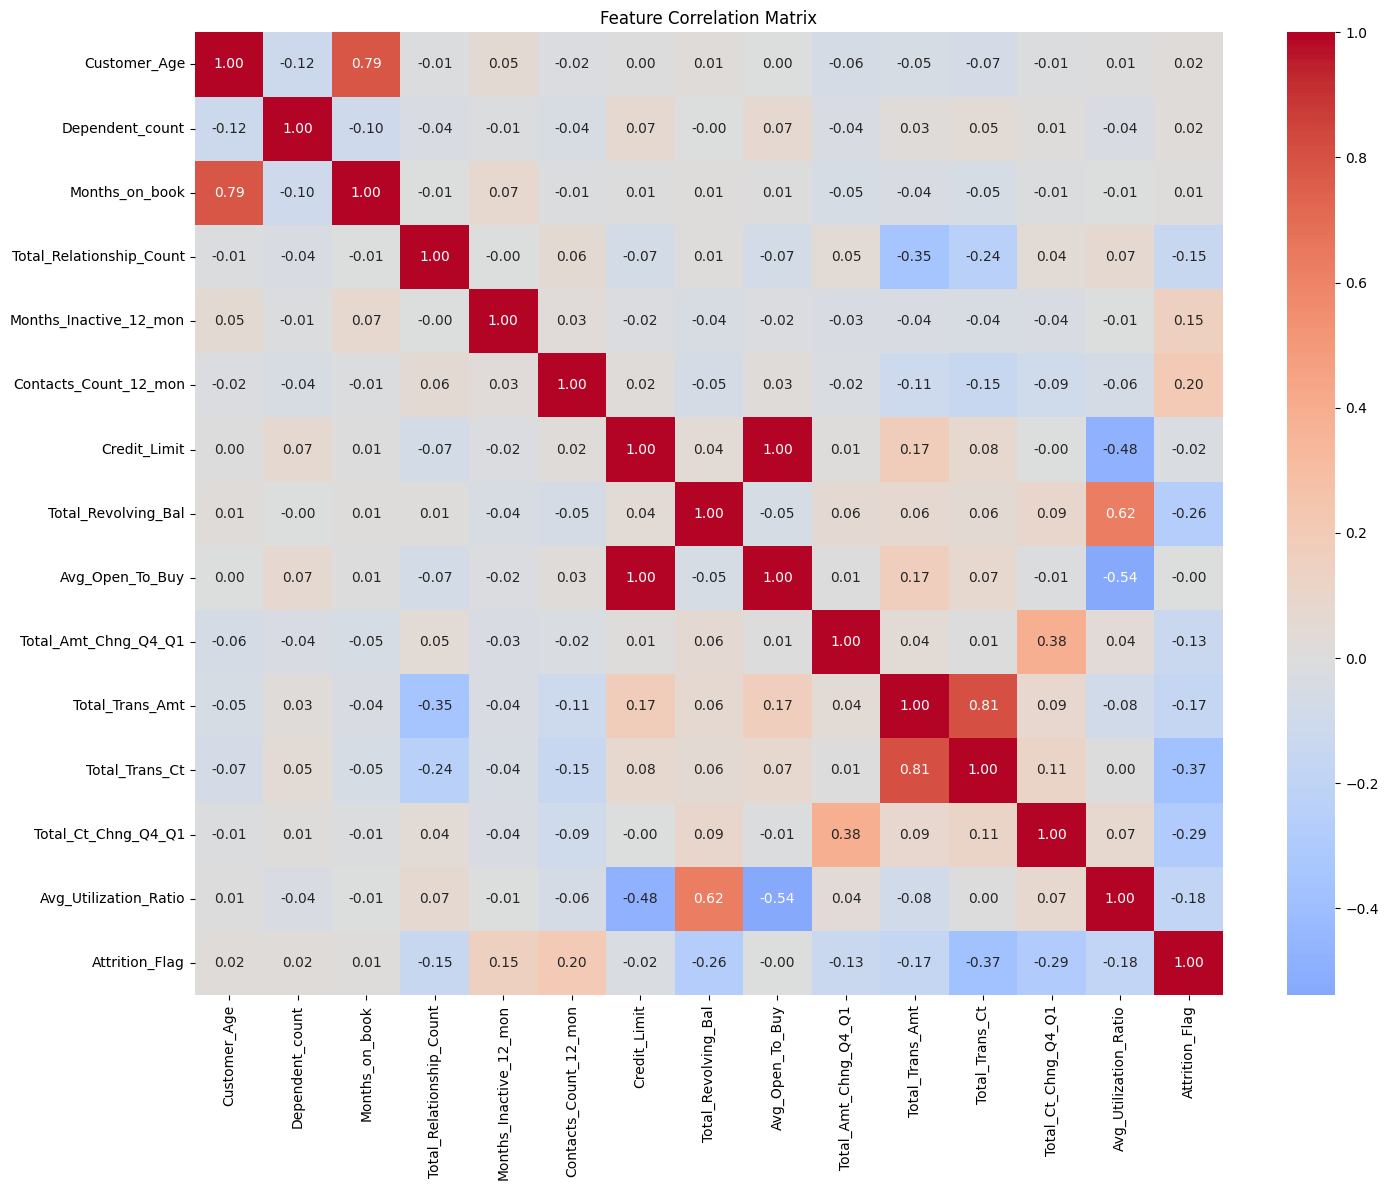

In [14]:
# Data cleaning and preprocessing
# Remove unnecessary columns and clean the data
print("Initial data cleaning...")

# Check for missing values
print("\nMissing values:")
print(df.isnull().sum())

# Basic statistics
print("\nBasic statistics:")
print(df.describe())

# Data preprocessing function
def preprocess_bank_data(df):
    """Preprocess the bank churners dataset"""
    # Create a copy
    data = df.copy()

    # Remove columns that are not useful for clustering
    columns_to_drop = ['CLIENTNUM', 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
                      'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2']
    data = data.drop(columns=columns_to_drop, errors='ignore')

    # Convert Attrition_Flag to binary
    data['Attrition_Flag'] = data['Attrition_Flag'].map({'Existing Customer': 0, 'Attrited Customer': 1})

    # Select features for clustering
    numerical_features = ['Customer_Age', 'Dependent_count', 'Months_on_book',
                         'Total_Relationship_Count', 'Months_Inactive_12_mon',
                         'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
                         'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
                         'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']

    categorical_features = ['Gender', 'Education_Level', 'Marital_Status',
                           'Income_Category', 'Card_Category']

    return data, numerical_features, categorical_features

# Preprocess data
df_clean, numerical_features, categorical_features = preprocess_bank_data(df)

print(f"Numerical features: {numerical_features}")
print(f"Categorical features: {categorical_features}")
print(f"Cleaned dataset shape: {df_clean.shape}")

# Exploratory Data Analysis
plt.figure(figsize=(20, 15))

# Distribution of numerical features
for i, feature in enumerate(numerical_features[:6]):
    plt.subplot(3, 4, i+1)
    plt.hist(df_clean[feature], bins=30, alpha=0.7, color='skyblue', edgecolor='black')
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

# Categorical features distribution
for i, feature in enumerate(categorical_features[:4]):
    plt.subplot(3, 4, i+7)
    df_clean[feature].value_counts().plot(kind='bar', color='lightgreen', alpha=0.7)
    plt.title(f'Distribution of {feature}')
    plt.xticks(rotation=45)

# Churn rate
plt.subplot(3, 4, 11)
churn_counts = df_clean['Attrition_Flag'].value_counts()
plt.bar(['Existing', 'Attrited'], churn_counts.values, color=['lightblue', 'salmon'], alpha=0.7)
plt.title('Customer Churn Distribution')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

# Correlation analysis
plt.figure(figsize=(15, 12))
correlation_matrix = df_clean[numerical_features + ['Attrition_Flag']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Feature Correlation Matrix')
plt.tight_layout()
plt.show()

**Feature Engineering and Preparation**

In [15]:
# Prepare data for clustering
def prepare_clustering_data(df, numerical_features, categorical_features):
    """Prepare data for clustering algorithms"""

    # Handle numerical features
    X_numerical = df[numerical_features].copy()

    # Handle categorical features with one-hot encoding
    X_categorical = pd.get_dummies(df[categorical_features], prefix=categorical_features)

    # Combine features
    X_combined = pd.concat([X_numerical, X_categorical], axis=1)

    # Standardize the features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X_combined)

    return X_scaled, scaler, X_combined.columns.tolist()

# Prepare the data
X_scaled, scaler, feature_names = prepare_clustering_data(df_clean, numerical_features, categorical_features)

print(f"Final feature set shape: {X_scaled.shape}")
print(f"Number of features: {len(feature_names)}")

Final feature set shape: (10127, 37)
Number of features: 37


Determining optimal k for K-Means...


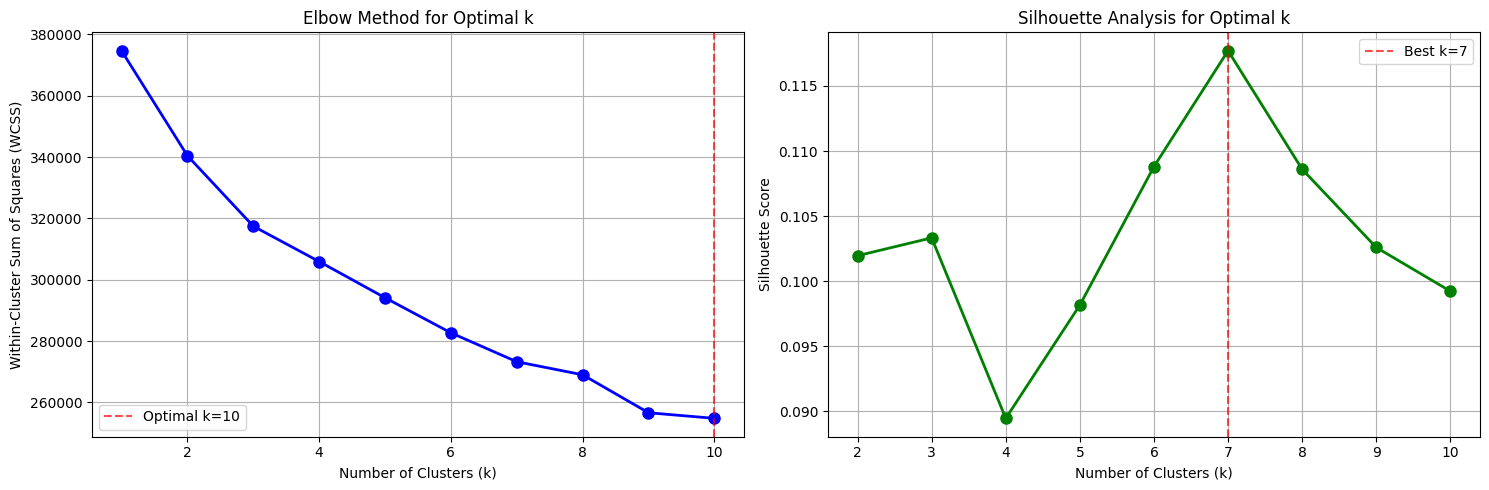

Silhouette Scores:
k=2: 0.102
k=3: 0.103
k=4: 0.089
k=5: 0.098
k=6: 0.109
k=7: 0.118
k=8: 0.109
k=9: 0.103
k=10: 0.099

Selected optimal k: 7


In [19]:
# Determine optimal k for K-Means
print("Determining optimal k for K-Means...")

# Elbow method
wcss = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Silhouette analysis
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(X_scaled)
    silhouette_avg = silhouette_score(X_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot both methods
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.plot(k_range, wcss, 'bo-', linewidth=2, markersize=8)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method for Optimal k')
plt.grid(True)

# Find elbow point (where the curve bends the most)
gradients = np.diff(wcss)
elbow_point = np.argmax(gradients) + 2  # +2 because we start from k=1 and gradients has one less element
plt.axvline(x=elbow_point, color='red', linestyle='--', alpha=0.7, label=f'Optimal k={elbow_point}')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(2, 11), silhouette_scores, 'go-', linewidth=2, markersize=8)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis for Optimal k')

# Find best silhouette score
best_silhouette_k = range(2, 11)[np.argmax(silhouette_scores)]
plt.axvline(x=best_silhouette_k, color='red', linestyle='--', alpha=0.7, label=f'Best k={best_silhouette_k}')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

print("Silhouette Scores:")
for k, score in zip(range(2, 11), silhouette_scores):
    print(f"k={k}: {score:.3f}")

# Choose optimal k based on both methods
optimal_k = best_silhouette_k  # Or use elbow_point if different
print(f"\nSelected optimal k: {optimal_k}")

In [20]:
# Apply K-Means with optimal k
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(X_scaled)

df_clean['KMeans_Cluster'] = kmeans_labels

print(f"\nK-Means clustering completed with k={optimal_k}")
print(f"Cluster distribution:")
print(pd.Series(kmeans_labels).value_counts().sort_index())
print(f"Silhouette Score: {silhouette_score(X_scaled, kmeans_labels):.3f}")

# Cluster centers analysis
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
cluster_centers_df = pd.DataFrame(cluster_centers, columns=feature_names)

print("\nTop features for each cluster:")
for cluster in range(optimal_k):
    print(f"\nCluster {cluster}:")
    top_features = cluster_centers_df.iloc[cluster].abs().nlargest(5)
    for feature, value in top_features.items():
        print(f"  {feature}: {value:.3f}")


K-Means clustering completed with k=7
Cluster distribution:
0    3394
1    2677
2     645
3     575
4     116
5    1045
6    1675
Name: count, dtype: int64
Silhouette Score: 0.118

Top features for each cluster:

Cluster 0:
  Total_Trans_Amt: 4234.131
  Credit_Limit: 3317.295
  Avg_Open_To_Buy: 2173.745
  Total_Revolving_Bal: 1143.550
  Total_Trans_Ct: 65.636

Cluster 1:
  Credit_Limit: 11446.789
  Avg_Open_To_Buy: 10268.747
  Total_Trans_Amt: 4247.763
  Total_Revolving_Bal: 1178.042
  Total_Trans_Ct: 61.804

Cluster 2:
  Credit_Limit: 17896.647
  Avg_Open_To_Buy: 16700.733
  Total_Trans_Amt: 4200.026
  Total_Revolving_Bal: 1195.915
  Total_Trans_Ct: 61.814

Cluster 3:
  Credit_Limit: 25451.944
  Avg_Open_To_Buy: 24243.664
  Total_Trans_Amt: 6674.283
  Total_Revolving_Bal: 1208.280
  Total_Trans_Ct: 75.127

Cluster 4:
  Credit_Limit: 28416.371
  Avg_Open_To_Buy: 27072.052
  Total_Trans_Amt: 7685.612
  Total_Revolving_Bal: 1344.319
  Total_Trans_Ct: 81.517

Cluster 5:
  Credit_Limit: 7


Applying DBSCAN clustering...


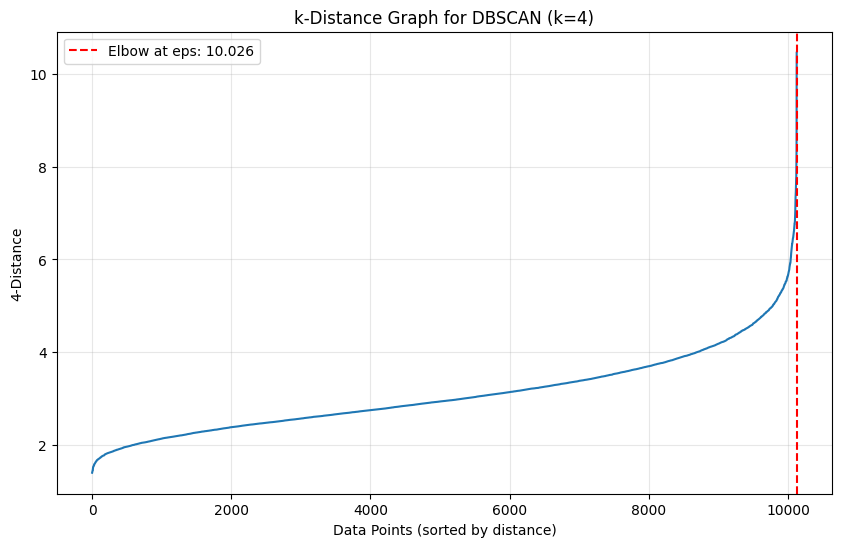

Suggested epsilon: 10.026
DBSCAN Parameter Comparison:
         eps  min_samples  n_clusters  n_noise  noise_ratio  silhouette
0  10.025974            5           3        0          0.0    0.393751
1  10.125974           10           3        0          0.0    0.393751
2   9.925974            5           3        0          0.0    0.393751

Best DBSCAN parameters: eps=10.026, min_samples=5.0
DBSCAN clusters: 3.0, noise points: 0.0
DBSCAN Silhouette Score: 0.394


In [21]:
# DBSCAN Clustering
print("\nApplying DBSCAN clustering...")

from sklearn.neighbors import NearestNeighbors

# Find optimal epsilon
def find_optimal_eps(X, k=4):
    neighbors = NearestNeighbors(n_neighbors=k)
    neighbors_fit = neighbors.fit(X)
    distances, indices = neighbors_fit.kneighbors(X)
    k_distances = np.sort(distances[:, k-1], axis=0)
    return k_distances

k_distances = find_optimal_eps(X_scaled)

plt.figure(figsize=(10, 6))
plt.plot(k_distances)
plt.xlabel('Data Points (sorted by distance)')
plt.ylabel('4-Distance')
plt.title('k-Distance Graph for DBSCAN (k=4)')
plt.grid(True, alpha=0.3)

# Find elbow point
gradients = np.diff(k_distances)
elbow_point = np.argmax(gradients) + 1
optimal_eps = k_distances[elbow_point]
plt.axvline(x=elbow_point, color='red', linestyle='--',
           label=f'Elbow at eps: {optimal_eps:.3f}')
plt.legend()
plt.show()

print(f"Suggested epsilon: {optimal_eps:.3f}")

# Apply DBSCAN with different parameters
dbscan_params = [
    (optimal_eps, 5),      # Based on k-distance graph
    (optimal_eps + 0.1, 10),  # Slightly more conservative
    (optimal_eps - 0.1, 5)   # Slightly more sensitive
]

dbscan_results = []

for eps, min_samples in dbscan_params:
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(X_scaled)

    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise = list(labels).count(-1)

    if n_clusters > 1:
        silhouette = silhouette_score(X_scaled, labels)
    else:
        silhouette = -1

    dbscan_results.append({
        'eps': eps,
        'min_samples': min_samples,
        'n_clusters': n_clusters,
        'n_noise': n_noise,
        'noise_ratio': n_noise / len(labels),
        'silhouette': silhouette
    })

dbscan_df = pd.DataFrame(dbscan_results)
print("DBSCAN Parameter Comparison:")
print(dbscan_df)

# Choose best DBSCAN parameters
best_dbscan = dbscan_df.loc[dbscan_df['silhouette'].idxmax()]
dbscan_optimal = DBSCAN(eps=best_dbscan['eps'], min_samples=int(best_dbscan['min_samples']))
dbscan_labels = dbscan_optimal.fit_predict(X_scaled)

df_clean['DBSCAN_Cluster'] = dbscan_labels
df_clean['DBSCAN_Noise'] = (dbscan_labels == -1)

print(f"\nBest DBSCAN parameters: eps={best_dbscan['eps']:.3f}, min_samples={best_dbscan['min_samples']}")
print(f"DBSCAN clusters: {best_dbscan['n_clusters']}, noise points: {best_dbscan['n_noise']}")
print(f"DBSCAN Silhouette Score: {best_dbscan['silhouette']:.3f}")

The DBSCAN results show an interesting issue - no noise points detected and only 3 clusters with relatively low silhouette score (0.394). This suggests that the epsilon value (10.026) might be too large, causing DBSCAN to group too many points together. We can fix this by refining the DBSCAN parameter tuning:


Refining DBSCAN parameter tuning...


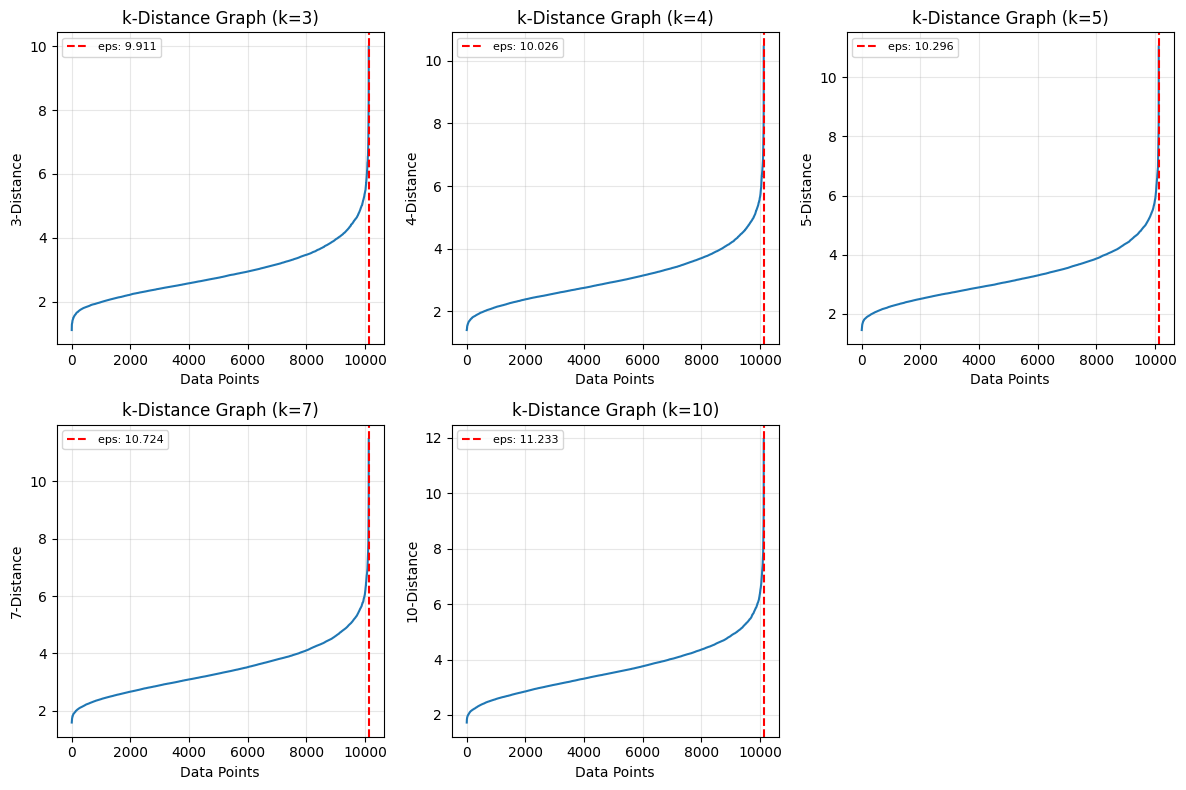

Performing refined DBSCAN parameter search...
Suggested epsilon range: 3.008 to 15.039
Refined DBSCAN parameter search results (top 10):
       eps  min_samples  n_clusters  n_noise  silhouette
6   11.029            3           2        0       0.663
7   12.365            3           2        0       0.663
8   13.702            3           2        0       0.663
9   15.039            3           2        0       0.663
16  11.029            5           2        0       0.663
17  12.365            5           2        0       0.663
18  13.702            5           2        0       0.663
19  15.039            5           2        0       0.663
26  11.029            7           2        0       0.663
27  12.365            7           2        0       0.663

🔧 REFINED DBSCAN RESULTS:
Parameters: eps=11.029, min_samples=3
Clusters: 2, Noise points: 0 (0.0%)
Silhouette Score: 0.663


In [24]:
# Improved DBSCAN Parameter Tuning
print("\nRefining DBSCAN parameter tuning...")

# Let's look at the k-distance graph more carefully
plt.figure(figsize=(12, 8))

# Test different k values for k-distance graph
k_values = [3, 4, 5, 7, 10]

for i, k in enumerate(k_values):
    k_distances = find_optimal_eps(X_scaled, k=k)

    plt.subplot(2, 3, i+1)
    plt.plot(k_distances)
    plt.xlabel('Data Points')
    plt.ylabel(f'{k}-Distance')
    plt.title(f'k-Distance Graph (k={k})')
    plt.grid(True, alpha=0.3)

    # Find elbow point more precisely
    gradients = np.diff(k_distances)
    # Use the point where gradient change is maximum
    elbow_point = np.argmax(gradients) + 1
    optimal_eps = k_distances[elbow_point]
    plt.axvline(x=elbow_point, color='red', linestyle='--',
               label=f'eps: {optimal_eps:.3f}')
    plt.legend(fontsize=8)

plt.tight_layout()
plt.show()

# Let's try a more systematic approach to find epsilon
def find_best_dbscan_parameters(X, min_samples_range=None, eps_range=None):
    """Find optimal DBSCAN parameters with better search strategy"""

    if min_samples_range is None:
        min_samples_range = [3, 5, 7, 10, 15]

    if eps_range is None:
        # Use k-distance with k=4 to suggest a reasonable range
        k_distances = find_optimal_eps(X, k=4)
        elbow_point = np.argmax(np.diff(k_distances)) + 1
        suggested_eps = k_distances[elbow_point]
        eps_range = np.linspace(suggested_eps * 0.3, suggested_eps * 1.5, 10)
        print(f"Suggested epsilon range: {eps_range[0]:.3f} to {eps_range[-1]:.3f}")

    results = []

    for min_samples in min_samples_range:
        for eps in eps_range:
            dbscan = DBSCAN(eps=eps, min_samples=min_samples)
            labels = dbscan.fit_predict(X)

            n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
            n_noise = list(labels).count(-1)
            noise_ratio = n_noise / len(labels)

            # Only calculate metrics if we have reasonable clusters
            if n_clusters > 1 and n_clusters < len(X) // 20 and noise_ratio < 0.5:
                try:
                    silhouette = silhouette_score(X, labels)
                    calinski = calinski_harabasz_score(X, labels)
                except:
                    silhouette = -1
                    calinski = -1
            else:
                silhouette = -1
                calinski = -1

            results.append({
                'eps': eps,
                'min_samples': min_samples,
                'n_clusters': n_clusters,
                'n_noise': n_noise,
                'noise_ratio': noise_ratio,
                'silhouette': silhouette,
                'calinski': calinski
            })

    return pd.DataFrame(results)

# Perform refined parameter search
print("Performing refined DBSCAN parameter search...")
dbscan_refined_results = find_best_dbscan_parameters(X_scaled)

# Filter out invalid results
valid_results = dbscan_refined_results[
    (dbscan_refined_results['silhouette'] > 0) &
    (dbscan_refined_results['n_clusters'] > 1) &
    (dbscan_refined_results['n_clusters'] < 10) &
    (dbscan_refined_results['noise_ratio'] < 0.3)
]

if len(valid_results) > 0:
    best_dbscan_refined = valid_results.nlargest(1, 'silhouette').iloc[0]
else:
    # If no valid results, use the original but with adjusted parameters
    print("No optimal parameters found with constraints, using relaxed search...")
    relaxed_results = dbscan_refined_results[dbscan_refined_results['silhouette'] > 0]
    if len(relaxed_results) > 0:
        best_dbscan_refined = relaxed_results.nlargest(1, 'silhouette').iloc[0]
    else:
        # Fallback to reasonable defaults
        best_dbscan_refined = {'eps': 2.0, 'min_samples': 10, 'silhouette': -1}

print("Refined DBSCAN parameter search results (top 10):")
top_results = dbscan_refined_results.nlargest(10, 'silhouette')[['eps', 'min_samples', 'n_clusters', 'n_noise', 'silhouette']]
print(top_results.round(3))

# Apply refined DBSCAN
refined_eps = best_dbscan_refined['eps']
refined_min_samples = int(best_dbscan_refined['min_samples'])

dbscan_refined = DBSCAN(eps=refined_eps, min_samples=refined_min_samples)
dbscan_refined_labels = dbscan_refined.fit_predict(X_scaled)

# Update dataframe with refined DBSCAN results
df_clean['DBSCAN_Cluster_Refined'] = dbscan_refined_labels
df_clean['DBSCAN_Noise_Refined'] = (dbscan_refined_labels == -1)

n_clusters_refined = len(set(dbscan_refined_labels)) - (1 if -1 in dbscan_refined_labels else 0)
n_noise_refined = list(dbscan_refined_labels).count(-1)

print(f"\n REFINED DBSCAN RESULTS:")
print(f"Parameters: eps={refined_eps:.3f}, min_samples={refined_min_samples}")
print(f"Clusters: {n_clusters_refined}, Noise points: {n_noise_refined} ({n_noise_refined/len(df_clean)*100:.1f}%)")

if n_clusters_refined > 1:
    silhouette_refined = silhouette_score(X_scaled, dbscan_refined_labels)
    print(f"Silhouette Score: {silhouette_refined:.3f}")
else:
    silhouette_refined = -1
    print("Cannot calculate silhouette score (only one cluster)")


